## Importing the python libraries and reading the data

In [1]:
# Import all the necessary libraries for python manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the day.csv file
boom = pd.read_csv("day.csv")

## Checking the overall structure of the data

In [3]:
#Lets see few rows of the data
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Lets see the column names
boom.columns.tolist()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [5]:
#Lets check the count of rows and columns
boom.shape

(730, 16)

In [6]:
#Lets check column wise dataype and null values count
boom.info() #From the output we can clearly see that there are no missing values in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Lets check the statistical analysis for the dataframe
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
## Lets drop few columns like instant (id) and dteday which won't help in the analysis in any way
boom = boom.drop(["instant", "dteday"], axis=1)

In [9]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Lets see the type of values some of these columns are holding
boom.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [11]:
#Lets observe year column values
boom.yr.value_counts() 
#2018 represents 0 and 2019 represents 1

yr
0    365
1    365
Name: count, dtype: int64

In [12]:
#Lets observe mnth column values
boom.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [13]:
#Lets observe holiday column values
boom.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [14]:
#Lets observe weekday column values
boom.weekday.value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [15]:
#Lets observe workingday column values
boom.workingday.value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [16]:
#Lets observe weathersit column values
boom.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [17]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Lets transform few columns like season, mnth, weekday and weathersit to make it more understandable 

In [18]:
boom["season"] = boom["season"].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

boom["mnth"] = boom["mnth"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                                 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

boom["weekday"] = boom["weekday"].map({1:"Wednesday", 2:"Thursday", 3:"Friday", 4:"Saturday", 5:"Sunday",
                                       6:"Monday", 0:"Tuesday"})

boom["weathersit"] = boom["weathersit"].map({1:"Clear", 2:"Misty", 3:"Light snow", 4:"Heavy rain"})

In [19]:
#Lets see the transformation of the data
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,January,0,Wednesday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,January,0,Thursday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,January,0,Friday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,January,0,Saturday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,January,0,Sunday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
#Lets check the data types of the columns
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [21]:
#Lets convert the datatype of casual, registered and cnt to float64
boom["casual"] = boom["casual"].astype("float64")
boom["registered"] = boom["registered"].astype("float64")
boom["cnt"] = boom["cnt"].astype("float64")

In [22]:
#Lets check the data types of the columns
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    float64
 12  registered  730 non-null    float64
 13  cnt         730 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 80.0+ KB


In [23]:
#Lets create a dataframe having all categorical variables and one dataframe with all numerical variables
boom_categorical = boom.select_dtypes(include=["object"])
boom_numerical = boom.select_dtypes(include=["float64"])

In [24]:
boom_categorical.head()

,season,mnth,weekday,weathersit
0,Spring,January,Wednesday,Misty
1,Spring,January,Thursday,Misty
2,Spring,January,Friday,Clear
3,Spring,January,Saturday,Clear
4,Spring,January,Sunday,Clear


In [25]:
boom_numerical.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


## Lets visualize the data

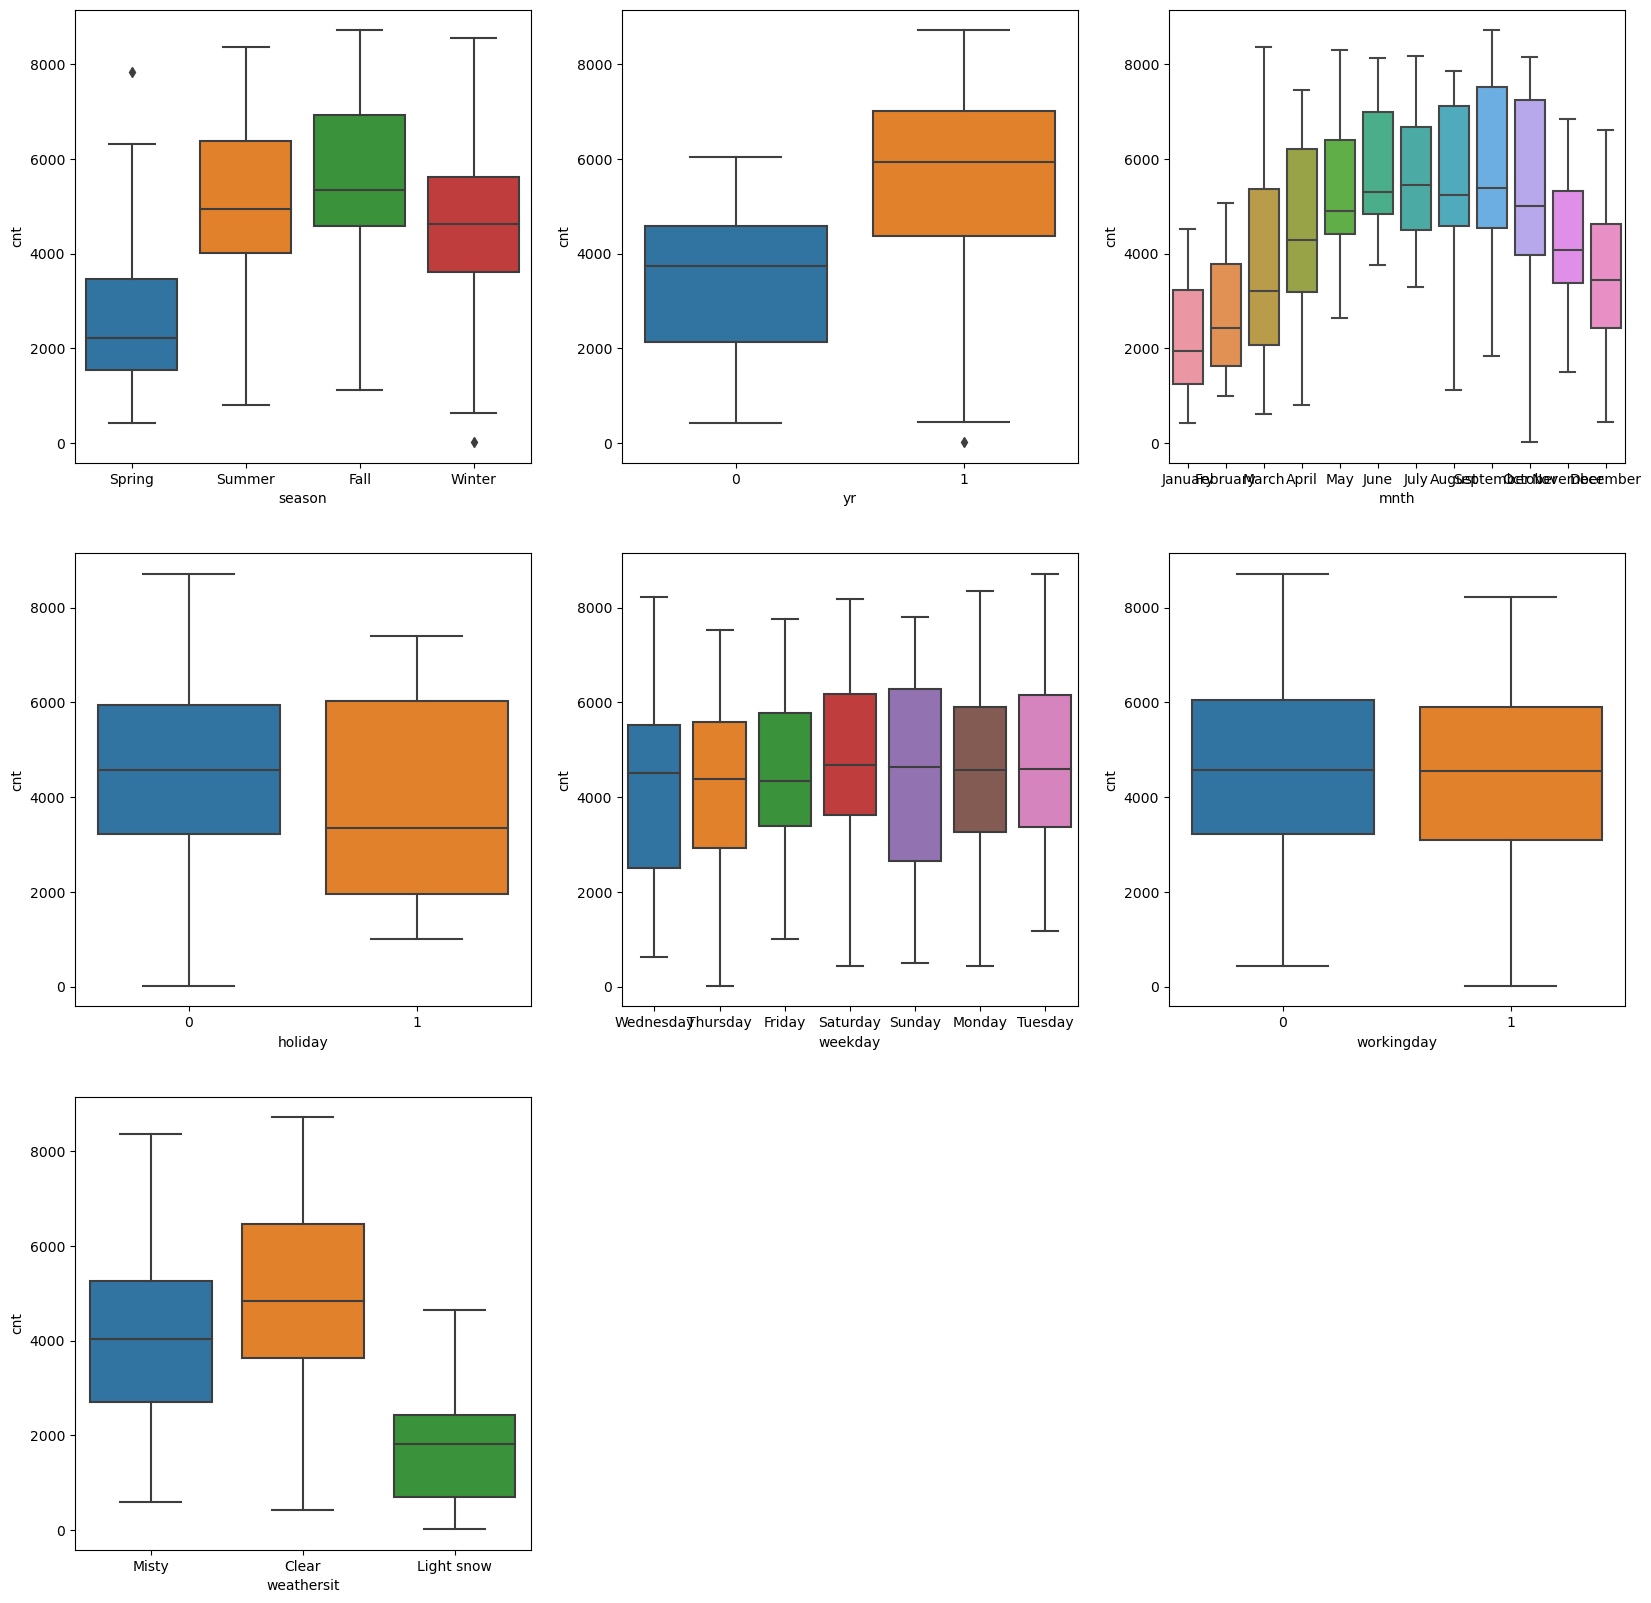

In [26]:
#Lets plot the categorical variables
plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
sns.boxplot(y="cnt", x="season", data=boom)
plt.subplot(3,3,2)
sns.boxplot(y="cnt", x="yr", data=boom)
plt.subplot(3,3,3)
sns.boxplot(y="cnt", x="mnth", data=boom)
plt.subplot(3,3,4)
sns.boxplot(y="cnt", x="holiday", data=boom)
plt.subplot(3,3,5)
sns.boxplot(y="cnt", x="weekday", data=boom)
plt.subplot(3,3,6)
sns.boxplot(y="cnt", x="workingday", data=boom)
plt.subplot(3,3,7)
sns.boxplot(y="cnt", x="weathersit", data=boom)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


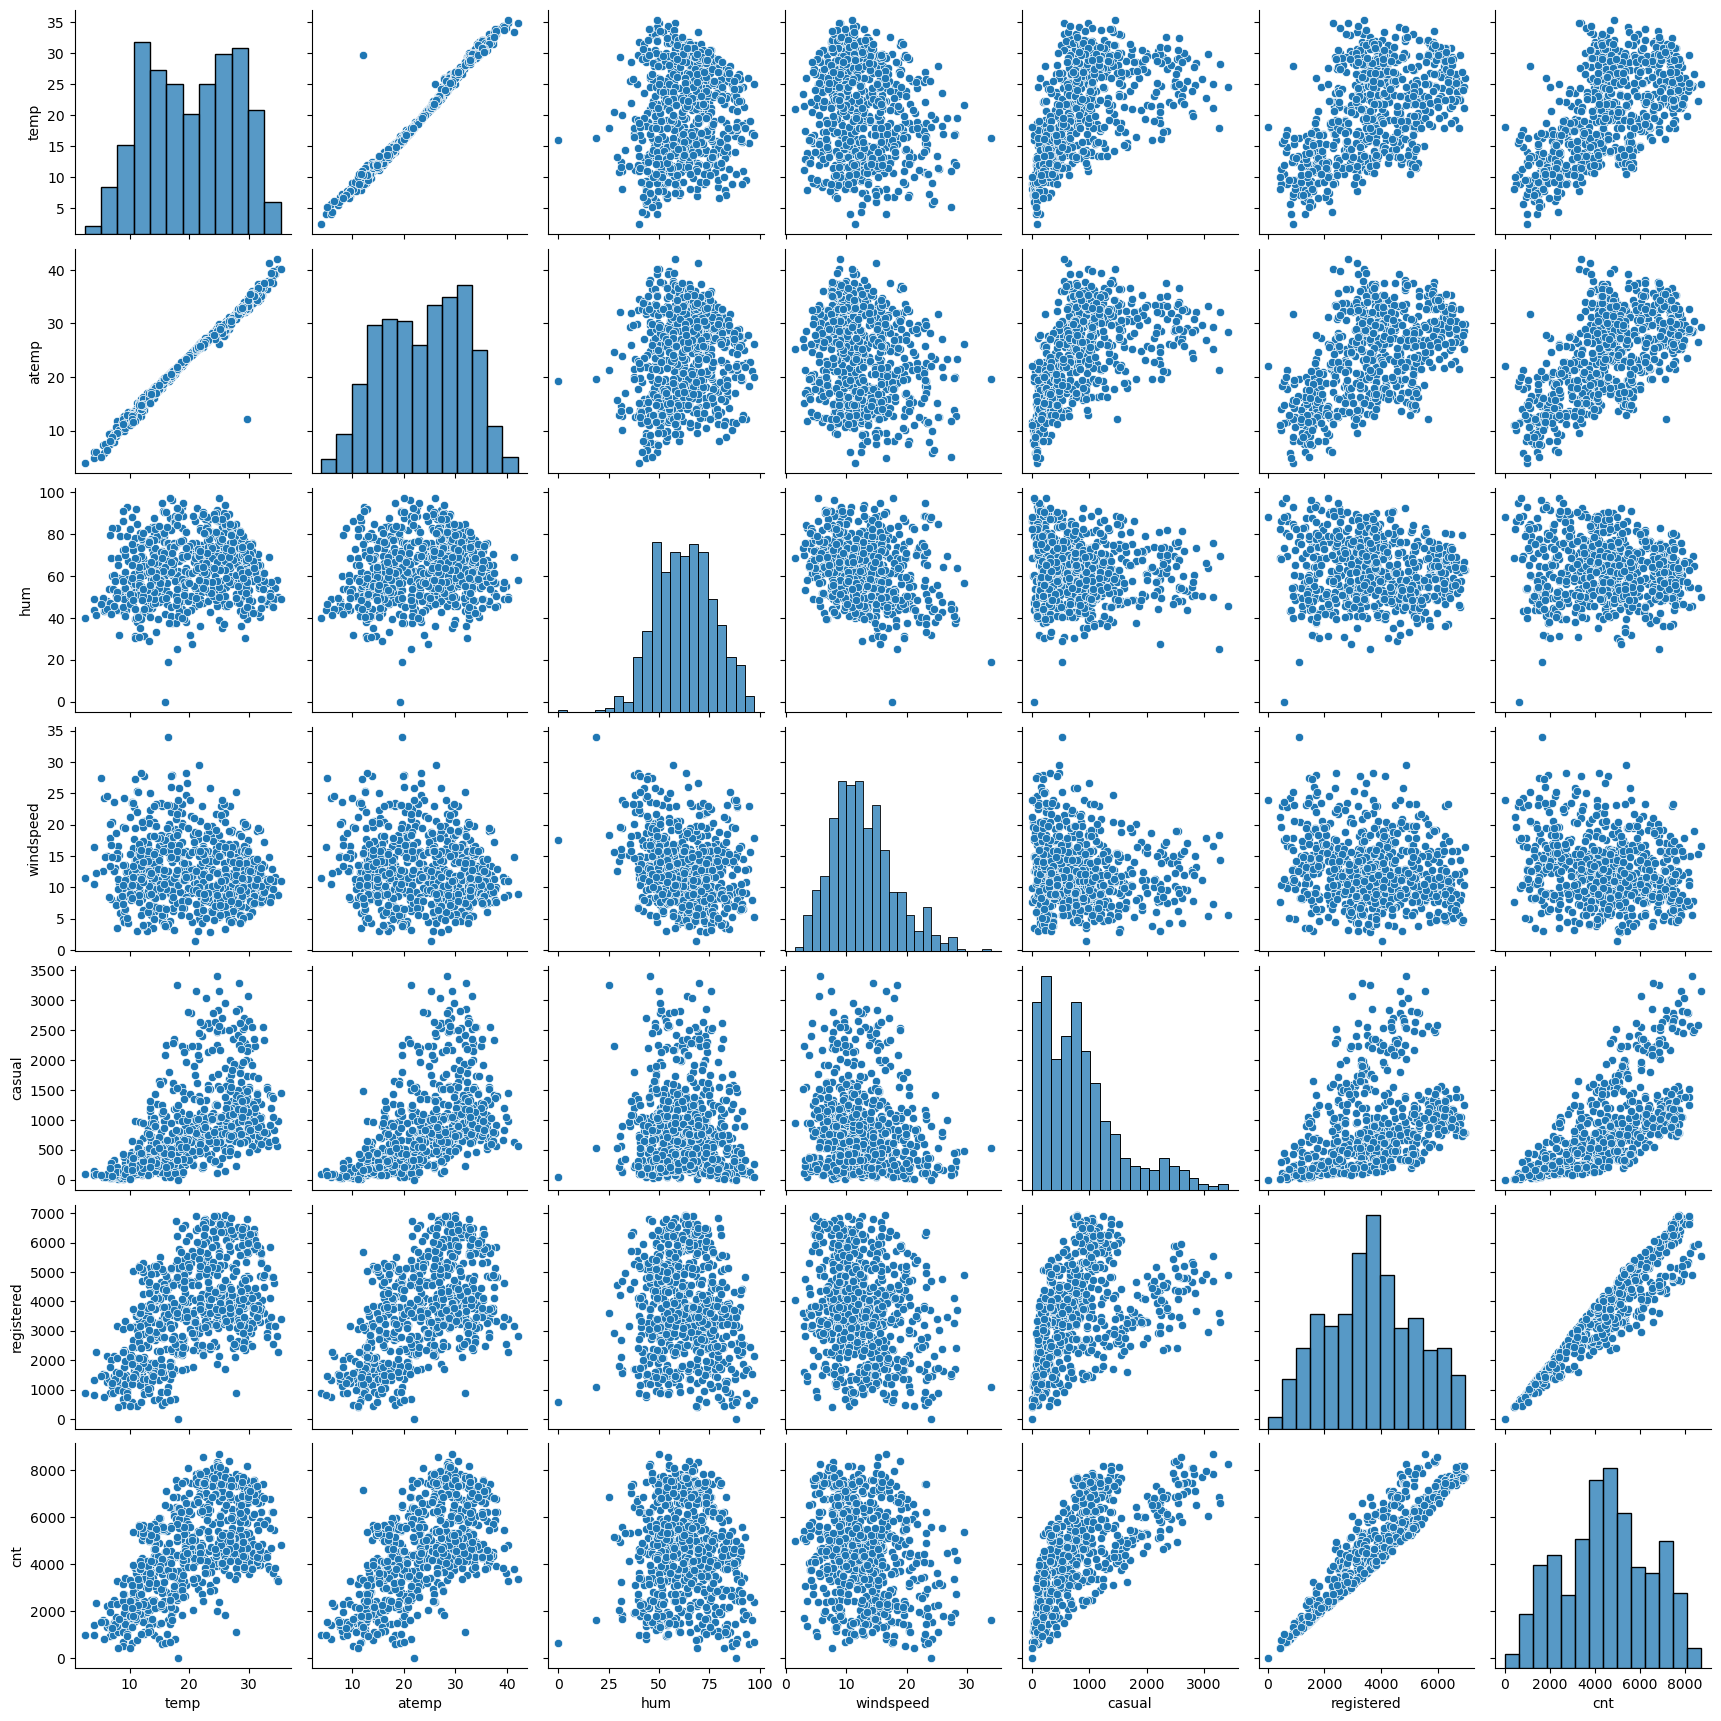

In [27]:
#Lets plot the numerical variables
sns.pairplot(boom_numerical)
plt.show()

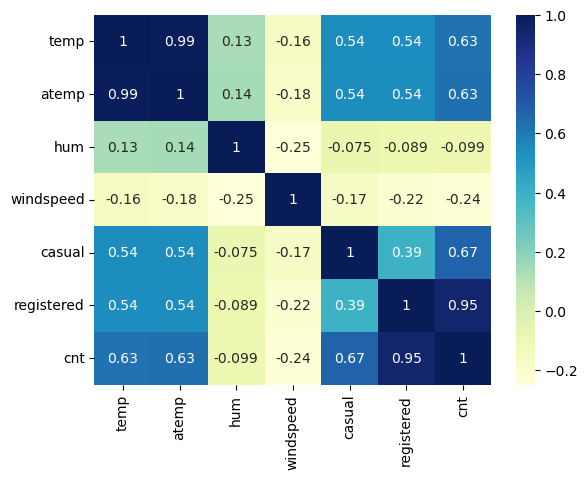

In [28]:
sns.heatmap(boom_numerical.corr(), annot=True, cmap="YlGnBu")
plt.show() #We can observe very high correlation between cnt and other numerical variables like temp

## Lets drop few unnecessary columns

In [29]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,January,0,Wednesday,1,Misty,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,Spring,0,January,0,Thursday,1,Misty,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,Spring,0,January,0,Friday,1,Clear,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,Spring,0,January,0,Saturday,1,Clear,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,Spring,0,January,0,Sunday,1,Clear,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [30]:
#Lets drop casual and registered as cnt is sum of casual and registered and also we can remove atemp as we already have temp
boom = boom.drop(["casual", "registered", "atemp"], axis=1)

In [31]:
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Wednesday,1,Misty,14.110847,80.5833,10.749882,985.0
1,Spring,0,January,0,Thursday,1,Misty,14.902598,69.6087,16.652113,801.0
2,Spring,0,January,0,Friday,1,Clear,8.050924,43.7273,16.636703,1349.0
3,Spring,0,January,0,Saturday,1,Clear,8.200000,59.0435,10.739832,1562.0
4,Spring,0,January,0,Sunday,1,Clear,9.305237,43.6957,12.522300,1600.0


## Dummy variable creation

In [32]:
#Lets create dummies for the categorical variables
boom_d = pd.get_dummies(boom_categorical, drop_first=True)

In [33]:
boom_d.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Misty
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [34]:
#Lets concat the dummy columns with main dataframe
boom = pd.concat([boom, boom_d], axis=1)
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Misty
0,Spring,0,January,0,Wednesday,1,Misty,14.110847,80.5833,10.749882,...,False,False,False,False,False,False,False,True,False,True
1,Spring,0,January,0,Thursday,1,Misty,14.902598,69.6087,16.652113,...,False,False,False,False,False,True,False,False,False,True
2,Spring,0,January,0,Friday,1,Clear,8.050924,43.7273,16.636703,...,False,False,False,False,False,False,False,False,False,False
3,Spring,0,January,0,Saturday,1,Clear,8.200000,59.0435,10.739832,...,False,False,False,True,False,False,False,False,False,False
4,Spring,0,January,0,Sunday,1,Clear,9.305237,43.6957,12.522300,...,False,False,False,False,True,False,False,False,False,False


In [35]:
boom = boom.drop(boom_categorical, axis=1)

In [36]:
boom.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Misty
0,0,0,1,14.110847,80.5833,10.749882,985.0,True,False,False,...,False,False,False,False,False,False,False,True,False,True
1,0,0,1,14.902598,69.6087,16.652113,801.0,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,43.7273,16.636703,1349.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562.0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600.0,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [37]:
boom.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light snow', 'weathersit_Misty'],
      dtype='object')

In [38]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [39]:
#Lets convert the true values to 1 and false to 0
boom["season_Spring"] = boom["season_Spring"].map({True:1, False:0})
boom["season_Summer"] = boom["season_Summer"].map({True:1, False:0})
boom["season_Winter"] = boom["season_Winter"].map({True:1, False:0})
boom["mnth_August"] = boom["mnth_August"].map({True:1, False:0})
boom["mnth_December"] = boom["mnth_December"].map({True:1, False:0})
boom["mnth_February"] = boom["mnth_February"].map({True:1, False:0})
boom["mnth_January"] = boom["mnth_January"].map({True:1, False:0})
boom["mnth_July"] = boom["mnth_July"].map({True:1, False:0})
boom["mnth_June"] = boom["mnth_June"].map({True:1, False:0})
boom["mnth_March"] = boom["mnth_March"].map({True:1, False:0})
boom["mnth_May"] = boom["mnth_May"].map({True:1, False:0})
boom["mnth_November"] = boom["mnth_November"].map({True:1, False:0})
boom["mnth_October"] = boom["mnth_October"].map({True:1, False:0})
boom["mnth_September"] = boom["mnth_September"].map({True:1, False:0})
boom["weekday_Monday"] = boom["weekday_Monday"].map({True:1, False:0})
boom["weekday_Saturday"] = boom["weekday_Saturday"].map({True:1, False:0})
boom["weekday_Sunday"] = boom["weekday_Sunday"].map({True:1, False:0})
boom["weekday_Thursday"] = boom["weekday_Thursday"].map({True:1, False:0})
boom["weekday_Tuesday"] = boom["weekday_Tuesday"].map({True:1, False:0})
boom["weekday_Wednesday"] = boom["weekday_Wednesday"].map({True:1, False:0})
boom["weathersit_Light snow"] = boom["weathersit_Light snow"].map({True:1, False:0})
boom["weathersit_Misty"] = boom["weathersit_Misty"].map({True:1, False:0})

In [40]:
boom.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Misty
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Lets split the data into training and test sets respectively

In [41]:
from sklearn.model_selection import train_test_split

boom_train, boom_test = train_test_split(boom, train_size=0.7, test_size=0.3, random_state=100)

## Rescaling the features using MinMaxScaler

In [42]:
boom.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Misty
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
#Lets import the necessary library for rescaling
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
#We performed rescaling only on training data. For test data we will do it later
vars = ["temp", "hum", "windspeed", "cnt"]
boom_train[vars] = scaler.fit_transform(boom_train[vars])
boom_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Misty
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


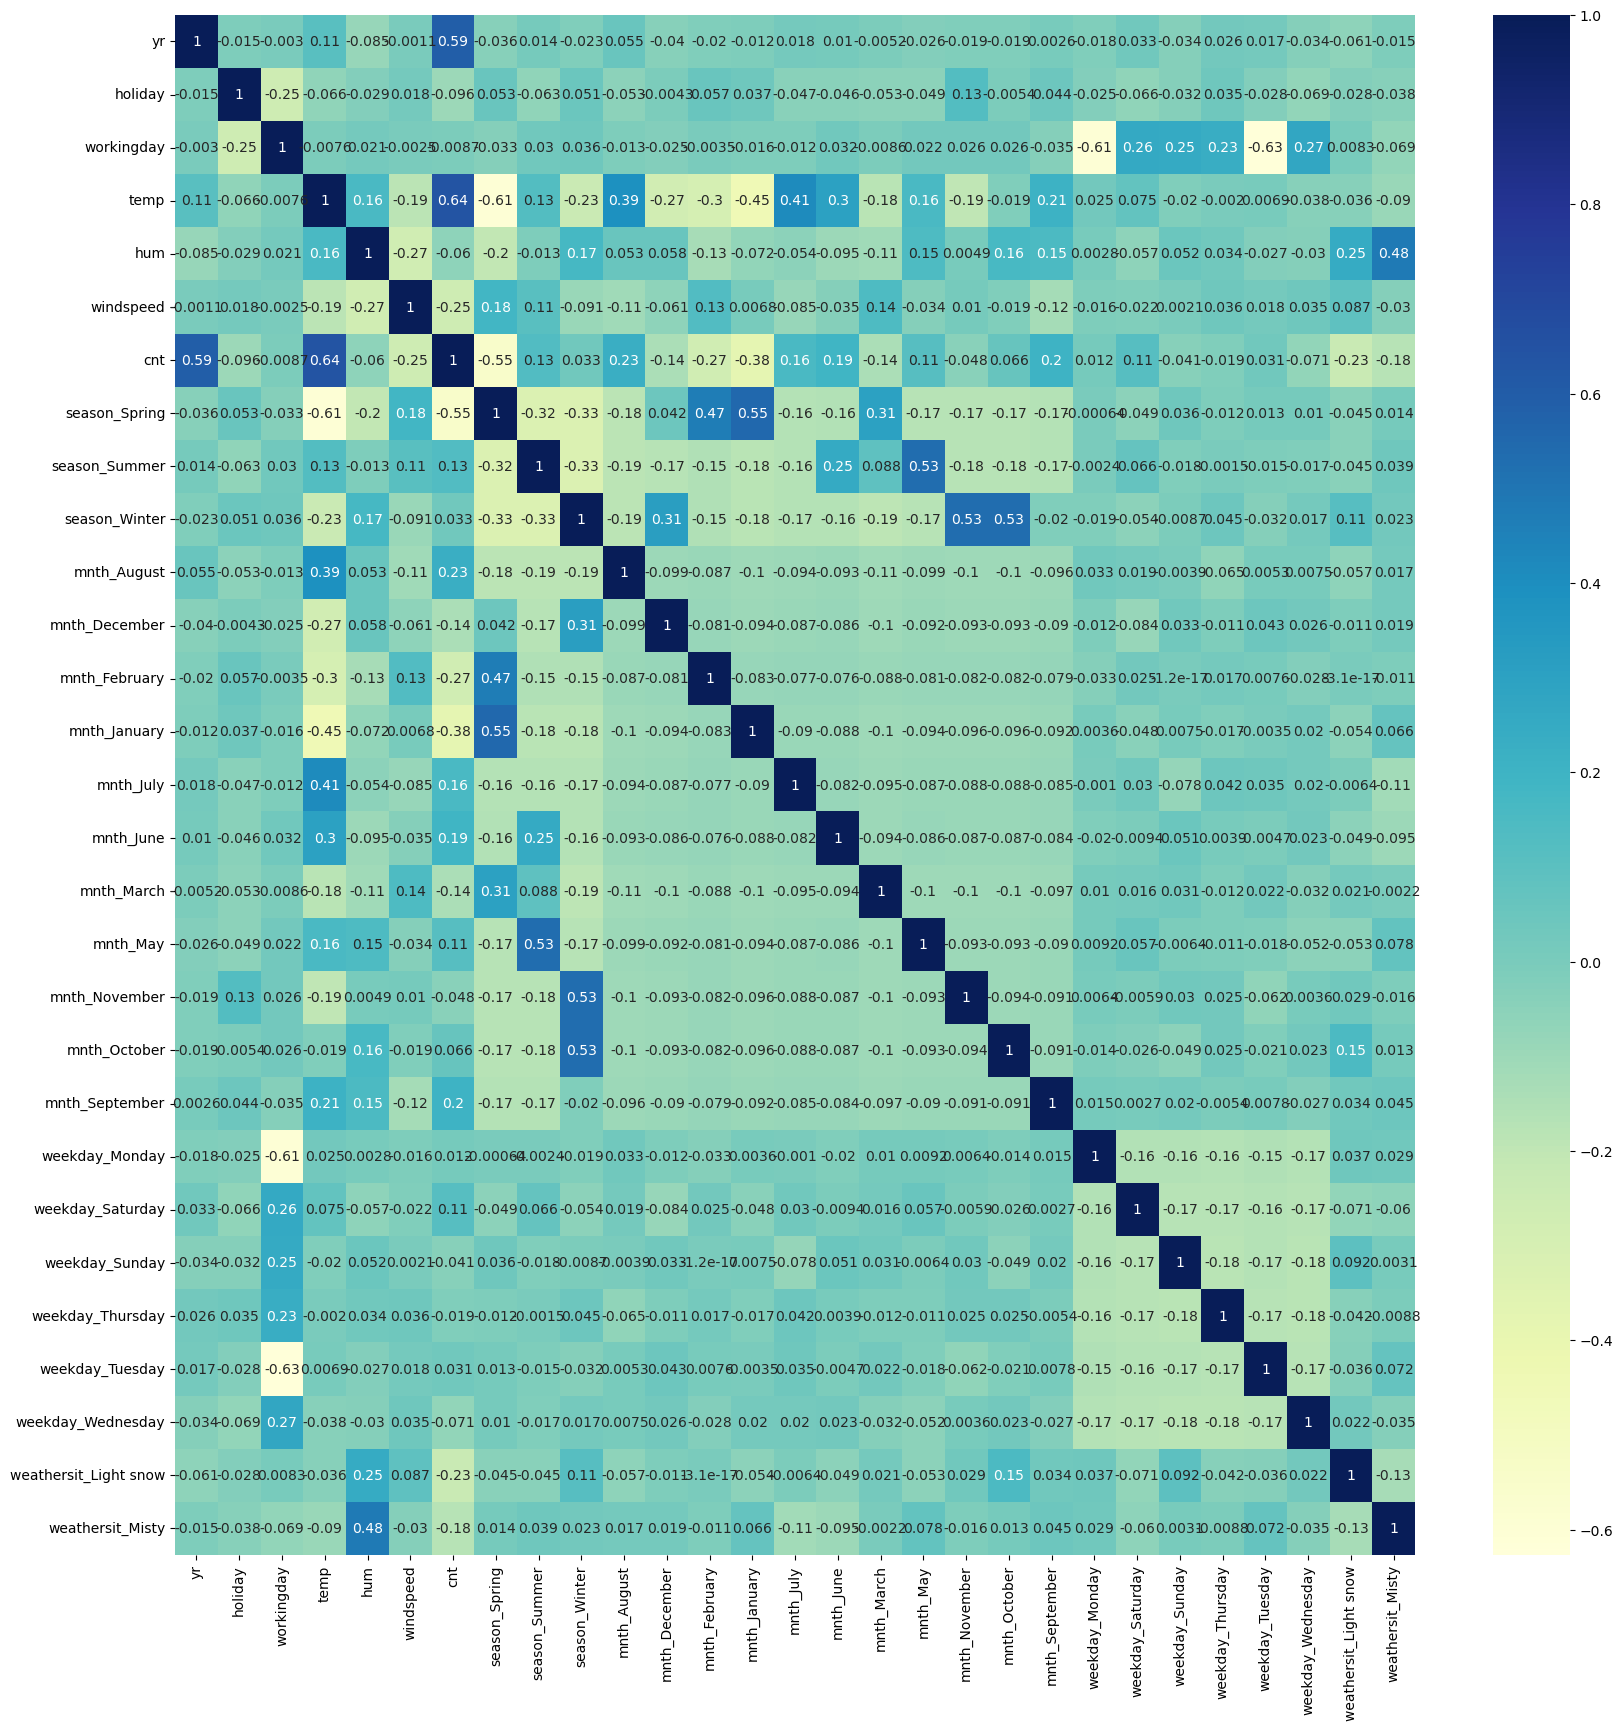

In [46]:
#Lets plot a heatmap between all the respective variables taken so far
plt.figure(figsize = [20, 20])
sns.heatmap(boom_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Dividing the training set into X and y and then building a linear model using RFE

In [47]:
y_train = boom_train.pop("cnt")
X_train = boom_train

In [48]:
X_train.shape

(510, 28)

In [49]:
y_train.shape

(510,)

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 6),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 4),
 ('weekday_Saturday', False, 10),
 ('weekday_Sunday', False, 11),
 ('weekday_Thursday', False, 7),
 ('weekday_Tuesday', False, 5),
 ('weekday_Wednesday', False, 8),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Misty', True, 1)]

In [53]:
#Columns ideally selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_Light snow',
       'weathersit_Misty'],
      dtype='object')

In [54]:
#Columns which are ranked false by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_August', 'mnth_February', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_October', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [56]:
import statsmodels.api as sm

#Lets add the constant
X_train_lm = sm.add_constant(X_train_rfe)

#Lets fit the model on training set explained by RFE
lr=sm.OLS(y_train,X_train_lm).fit()

In [57]:
#Check the parameters obtained
lr.params

const                    0.320243
yr                       0.230328
holiday                 -0.091228
temp                     0.479977
hum                     -0.160227
windspeed               -0.188457
season_Spring           -0.061737
season_Summer            0.040767
season_Winter            0.103435
mnth_December           -0.037199
mnth_January            -0.043748
mnth_July               -0.055495
mnth_November           -0.040949
mnth_September           0.074891
weathersit_Light snow   -0.248116
weathersit_Misty        -0.055876
dtype: float64

In [58]:
# Print a summary of the linear regression model obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          3.34e-189
Time:                        12:49:27   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3202      0.036      8.886      0.000       0.249       0.391
yr                        0.2303      0.008     28.511      0.000       0.214       0.246
holiday                  -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                      0.4800      0.037     12.977      0.000       0.407       0.553
hum                      -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_Spring            -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_Summer             0.0408      0.015      2.659      0.008       0.011       0.071
season_Winter             0.1034      0.018      5.763      0.000       0.068       0.139
mnth_December            -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_January             -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July                -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_November            -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_September            0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Light snow    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Misty         -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
#The adjusted R square for all the variables is 0.841

In [59]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Lets create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_Spring,4.37
7,season_Winter,4.06
6,season_Summer,2.81
14,weathersit_Misty,2.32
0,yr,2.09
11,mnth_November,1.83
9,mnth_January,1.75


In [62]:
#We can see that hum has very high VIF (>5) and it has very low correlation with cnt
X = X_train_rfe.drop(["hum"], axis=1)

In [63]:
#Lets fit the model again
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.57e-186
Time:                        13:01:47   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2466      0.032      7.679      0.000       0.184       0.310
yr                        0.2343      0.008     28.709      0.000       0.218       0.250
holiday                  -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                      0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_Spring            -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_Summer             0.0333      0.015      2.148      0.032       0.003       0.064
season_Winter             0.0887      0.018      4.951      0.000       0.053       0.124
mnth_December            -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_January             -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_July                -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_November            -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_September            0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Light snow    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_Misty         -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_Winter,2.94
4,season_Spring,2.89
5,season_Summer,2.23
0,yr,2.07
10,mnth_November,1.80
8,mnth_January,1.66
9,mnth_July,1.59
13,weathersit_Misty,1.56


In [65]:
#Lets go ahead with removing season_Summer 
X = X.drop(["season_Summer"], axis=1)

In [66]:
#Lets fit the model again
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.08e-186
Time:                        13:10:31   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2893      0.025     11.427      0.000       0.240       0.339
yr                        0.2348      0.008     28.679      0.000       0.219       0.251
holiday                  -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temp                      0.4026      0.032     12.407      0.000       0.339       0.466
windspeed                -0.1540      0.025     -6.108      0.000      -0.204      -0.104
season_Spring            -0.1034      0.016     -6.613      0.000      -0.134      -0.073
season_Winter             0.0650      0.014      4.588      0.000       0.037       0.093
mnth_December            -0.0510      0.017     -2.918      0.004      -0.085      -0.017
mnth_January             -0.0556      0.018     -3.047      0.002      -0.091      -0.020
mnth_July                -0.0643      0.017     -3.705      0.000      -0.098      -0.030
mnth_November            -0.0488      0.019     -2.593      0.010      -0.086      -0.012
mnth_September            0.0537      0.016      3.409      0.001       0.023       0.085
weathersit_Light snow    -0.2949      0.025    -11.954      0.000      -0.343      -0.246
weathersit_Misty         -0.0812      0.009     -9.297      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_Winter,2.54
4,season_Spring,2.36
0,yr,2.06
9,mnth_November,1.80
7,mnth_January,1.65
12,weathersit_Misty,1.53
6,mnth_December,1.46
8,mnth_July,1.36


In [68]:
#Lets go ahead with removing mnth_November 
X = X.drop(["mnth_November"], axis=1)

In [69]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          2.02e-186
Time:                        13:13:06   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2769      0.025     11.074      0.000       0.228       0.326
yr                        0.2348      0.008     28.510      0.000       0.219       0.251
holiday                  -0.0994      0.026     -3.812      0.000      -0.151      -0.048
temp                      0.4200      0.032     13.153      0.000       0.357       0.483
windspeed                -0.1542      0.025     -6.079      0.000      -0.204      -0.104
season_Spring            -0.0997      0.016     -6.369      0.000      -0.130      -0.069
season_Winter             0.0482      0.013      3.804      0.000       0.023       0.073
mnth_December            -0.0340      0.016     -2.086      0.037      -0.066      -0.002
mnth_January             -0.0506      0.018     -2.769      0.006      -0.086      -0.015
mnth_July                -0.0671      0.017     -3.849      0.000      -0.101      -0.033
mnth_September            0.0575      0.016      3.649      0.000       0.027       0.088
weathersit_Light snow    -0.2904      0.025    -11.735      0.000      -0.339      -0.242
weathersit_Misty         -0.0802      0.009     -9.144      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       62.888   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.760
Skew:                          -0.643   Prob(JB):                     6.74e-34
Kurtosis:                       5.353   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_Spring,2.36
0,yr,2.06
5,season_Winter,1.64
7,mnth_January,1.64
11,weathersit_Misty,1.53
8,mnth_July,1.36
6,mnth_December,1.29
9,mnth_September,1.20


In [71]:
#Lets go ahead with removing mnth_December 
X = X.drop(["mnth_December"], axis=1)

In [72]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.13e-186
Time:                        13:14:41   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2657      0.025     10.843      0.000       0.218       0.314
yr                        0.2348      0.008     28.426      0.000       0.219       0.251
holiday                  -0.0977      0.026     -3.738      0.000      -0.149      -0.046
temp                      0.4335      0.031     13.817      0.000       0.372       0.495
windspeed                -0.1482      0.025     -5.863      0.000      -0.198      -0.099
season_Spring            -0.1013      0.016     -6.459      0.000      -0.132      -0.071
season_Winter             0.0432      0.012      3.462      0.001       0.019       0.068
mnth_January             -0.0427      0.018     -2.382      0.018      -0.078      -0.007
mnth_July                -0.0693      0.017     -3.967      0.000      -0.104      -0.035
mnth_September            0.0587      0.016      3.710      0.000       0.028       0.090
weathersit_Light snow    -0.2877      0.025    -11.601      0.000      -0.336      -0.239
weathersit_Misty         -0.0802      0.009     -9.106      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       58.998   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.235
Skew:                          -0.614   Prob(JB):                     5.83e-31
Kurtosis:                       5.246   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_Spring,2.25
0,yr,2.06
6,mnth_January,1.60
10,weathersit_Misty,1.53
5,season_Winter,1.40
7,mnth_July,1.36
8,mnth_September,1.20
9,weathersit_Light snow,1.08


In [74]:
#Lets go ahead with removing mnth_January 
X = X.drop(["mnth_January"], axis=1)

In [75]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.16e-186
Time:                        13:16:31   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2519      0.024     10.530      0.000       0.205       0.299
yr                        0.2341      0.008     28.224      0.000       0.218       0.250
holiday                  -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temp                      0.4515      0.031     14.758      0.000       0.391       0.512
windspeed                -0.1398      0.025     -5.559      0.000      -0.189      -0.090
season_Spring            -0.1108      0.015     -7.265      0.000      -0.141      -0.081
season_Winter             0.0473      0.012      3.804      0.000       0.023       0.072
mnth_July                -0.0727      0.017     -4.160      0.000      -0.107      -0.038
mnth_September            0.0577      0.016      3.635      0.000       0.027       0.089
weathersit_Light snow    -0.2864      0.025    -11.499      0.000      -0.335      -0.237
weathersit_Misty         -0.0811      0.009     -9.182      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,season_Spring,1.65
9,weathersit_Misty,1.51
5,season_Winter,1.40
6,mnth_July,1.35
7,mnth_September,1.20
8,weathersit_Light snow,1.08
1,holiday,1.04


In [79]:
#Final list of columns after reaching optimum
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter',
       'mnth_July', 'mnth_September', 'weathersit_Light snow',
       'weathersit_Misty'],
      dtype='object')

## Residual analysis of the training data

In [77]:
#Lets predict the cnt variable based on the model obtained
y_train_cnt = lr.predict(X_train_lm)

C:\Users\HP\AppData\Local\Temp\ipykernel_9812\1563082330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

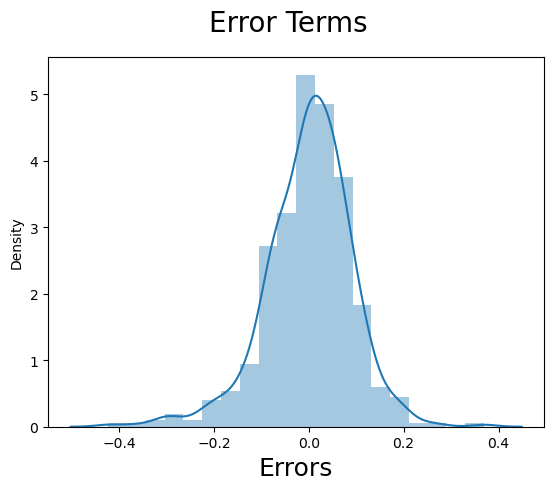

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                         

## Making prediction on test data

In [84]:
boom_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Misty
184,0,1,0,29.793347,63.7917,5.459106,6043.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [85]:
#Applying scaling on test set
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

boom_test[num_vars] = scaler.transform(boom_test[num_vars])

In [86]:
#Dividing test set into X and y 
y_test = boom_test.pop('cnt')
X_test = boom_test

In [87]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [88]:
# Making predictions
y_pred = lr.predict(X_test_new)

## Model evaluation

Text(0, 0.5, 'y_pred')

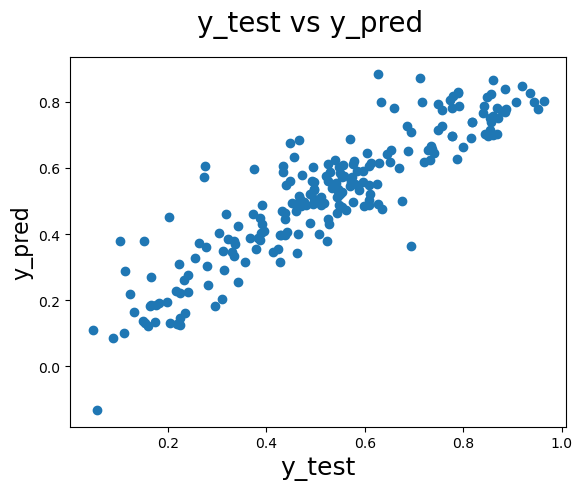

In [89]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### We can see that the equation of our best fitted line is:

cnt = 0.2519 + 0.2341(yr) -0.0986(holiday) + 0.4515(temp) - 0.1398(windspeed) - 0.1108(season_Spring) + 0.473(season_Winter) -   0.0727(mnth_July) + 0.0577(mnth_September) - 0.2864(weathersit_Light snow) - 0.0811(weathersit_Misty)

In [91]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

0.07165668005653539
0.009166211172450249
0.09574033200511814
0.8070101019557963


## Manual model selection

In [92]:
# Lets split the data into training and test sets respectively
from sklearn.model_selection import train_test_split

boom_train, boom_test = train_test_split(boom, train_size=0.7, test_size=0.3, random_state=100)

In [93]:
#Rescaling the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler()

In [95]:
vars = ["temp", "hum", "windspeed", "cnt"]
boom_train[vars] = scaler.fit_transform(boom_train[vars])
boom_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Misty
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [97]:
#Dividing the training set into X and y and then building a linear model
y_train = boom_train.pop("cnt")
X_train = boom_train

In [98]:
#Lets fit the model
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                    0.383302
yr                       0.230857
holiday                 -0.135424
workingday              -0.060524
temp                     0.445458
hum                     -0.157315
windspeed               -0.183046
season_Spring           -0.043705
season_Summer            0.042243
season_Winter            0.110897
mnth_August              0.021507
mnth_December           -0.045669
mnth_February           -0.037279
mnth_January            -0.063612
mnth_July               -0.034910
mnth_June                0.000975
mnth_March               0.000608
mnth_May                 0.024064
mnth_November           -0.041555
mnth_October             0.005790
mnth_September           0.086055
weekday_Monday          -0.045078
weekday_Saturday         0.015104
weekday_Sunday           0.011241
weekday_Thursday        -0.015058
weekday_Tuesday         -0.038721
weekday_Wednesday       -0.013392
weathersit_Light snow   -0.251511
weathersit_Misty        -0.059355
dtype: float64

In [99]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          4.33e-179
Time:                        18:02:00   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3833      0.084      4.558      0.000       0.218       0.549
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_Spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_Summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_Winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_August               0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_December            -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_February            -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_January             -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_July                -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_June                 0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_March                0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_November            -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_October              0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_September            0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Monday           -0.0451      0.071     -0.637      0.524      -0.184       0.094
weekday_Saturday          0.0151      0.015      0.980      0.327      -0.015       0.045
weekday_Sunday            0.0112      0.015      0.736      0.462      -0.019       0.041
weekday_Thursday         -0.0151      0.015     -1.005      0.315      -0.045       0.014
weekday_Tuesday          -0.0387      0.071     -0.548      0.584      -0.178       0.100
weekday_Wednesday        -0.0134      0.015     -0.886      0.376      -0.043       0.016
weathersit_Light snow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Misty         -0.0594      0.011     -5.637      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

In [100]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,64.59
3,temp,44.11
4,hum,41.16
6,season_Spring,13.53
8,season_Winter,12.49
24,weekday_Tuesday,12.33
20,weekday_Monday,11.83
7,season_Summer,9.79
17,mnth_November,7.18
18,mnth_October,6.95


In [102]:
#Lets go ahead with removing workingday as it has both high p value and high VIF
X = X_train.drop(["workingday"], axis=1)

In [103]:
#Lets fit the model
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          6.08e-180
Time:                        21:02:52   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     482   BIC:                            -872.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3225      0.045      7.241      0.000       0.235       0.410
yr                        0.2313      0.008     28.495      0.000       0.215       0.247
holiday                  -0.0844      0.026     -3.218      0.001      -0.136      -0.033
temp                      0.4470      0.047      9.556      0.000       0.355       0.539
hum                      -0.1565      0.039     -4.030      0.000      -0.233      -0.080
windspeed                -0.1837      0.026     -7.066      0.000      -0.235      -0.133
season_Spring            -0.0434      0.030     -1.435      0.152      -0.103       0.016
season_Summer             0.0424      0.026      1.604      0.109      -0.010       0.094
season_Winter             0.1101      0.028      3.914      0.000       0.055       0.165
mnth_August               0.0208      0.034      0.613      0.540      -0.046       0.088
mnth_December            -0.0449      0.034     -1.327      0.185      -0.111       0.022
mnth_February            -0.0368      0.033     -1.106      0.269      -0.102       0.029
mnth_January             -0.0632      0.034     -1.869      0.062      -0.130       0.003
mnth_July                -0.0356      0.035     -1.004      0.316      -0.105       0.034
mnth_June                 0.0003      0.025      0.014      0.989      -0.049       0.050
mnth_March                0.0005      0.025      0.019      0.985      -0.048       0.049
mnth_May                  0.0234      0.021      1.104      0.270      -0.018       0.065
mnth_November            -0.0428      0.037     -1.167      0.244      -0.115       0.029
mnth_October              0.0064      0.036      0.176      0.860      -0.065       0.077
mnth_September            0.0861      0.032      2.670      0.008       0.023       0.149
weekday_Monday            0.0137      0.016      0.878      0.380      -0.017       0.044
weekday_Saturday          0.0142      0.015      0.922      0.357      -0.016       0.044
weekday_Sunday            0.0104      0.015      0.684      0.494      -0.020       0.040
weekday_Thursday         -0.0156      0.015     -1.043      0.297      -0.045       0.014
weekday_Tuesday           0.0200      0.015      1.297      0.195      -0.010       0.050
weekday_Wednesday        -0.0143      0.015     -0.948      0.344      -0.044       0.015
weathersit_Light snow    -0.2514      0.027     -9.453      0.000      -0.304      -0.199
weathersit_Misty         -0.0592      0.011     -5.622      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       78.384   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.056
Skew:                          -0.769   Prob(JB):       

In [104]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,37.74
2,temp,37.69
5,season_Spring,11.87
7,season_Winter,11.73
6,season_Summer,6.90
17,mnth_October,6.41
16,mnth_November,6.14
8,mnth_August,5.88
12,mnth_July,5.29
11,mnth_January,5.21


In [105]:
#Lets go ahead with removing hum as it has very high VIF and very less correlation with target variable cnt
X = X.drop(["hum"], axis=1)

In [106]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     101.8
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.63e-177
Time:                        21:13:23   Log-Likelihood:                 514.97
No. Observations:                 510   AIC:                            -975.9
Df Residuals:                     483   BIC:                            -861.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2600      0.042      6.131      0.000       0.177       0.343
yr                        0.2351      0.008     28.717      0.000       0.219       0.251
holiday                  -0.0830      0.027     -3.115      0.002      -0.135      -0.031
temp                      0.3958      0.046      8.656      0.000       0.306       0.486
windspeed                -0.1551      0.025     -6.107      0.000      -0.205      -0.105
season_Spring            -0.0479      0.031     -1.561      0.119      -0.108       0.012
season_Summer             0.0330      0.027      1.235      0.217      -0.020       0.086
season_Winter             0.1062      0.029      3.719      0.000       0.050       0.162
mnth_August               0.0174      0.035      0.505      0.614      -0.050       0.085
mnth_December            -0.0677      0.034     -1.996      0.047      -0.134      -0.001
mnth_February            -0.0505      0.034     -1.502      0.134      -0.116       0.016
mnth_January             -0.0827      0.034     -2.430      0.015      -0.149      -0.016
mnth_July                -0.0319      0.036     -0.887      0.376      -0.103       0.039
mnth_June                 0.0081      0.026      0.315      0.753      -0.042       0.058
mnth_March               -0.0074      0.025     -0.297      0.766      -0.057       0.042
mnth_May                  0.0164      0.021      0.762      0.446      -0.026       0.059
mnth_November            -0.0601      0.037     -1.625      0.105      -0.133       0.013
mnth_October             -0.0115      0.036     -0.317      0.752      -0.083       0.060
mnth_September            0.0740      0.033      2.268      0.024       0.010       0.138
weekday_Monday            0.0164      0.016      1.034      0.302      -0.015       0.048
weekday_Saturday          0.0156      0.016      1.001      0.317      -0.015       0.046
weekday_Sunday            0.0098      0.015      0.636      0.525      -0.021       0.040
weekday_Thursday         -0.0185      0.015     -1.218      0.224      -0.048       0.011
weekday_Tuesday           0.0229      0.016      1.461      0.145      -0.008       0.054
weekday_Wednesday        -0.0141      0.015     -0.922      0.357      -0.044       0.016
weathersit_Light snow    -0.2938      0.025    -11.845      0.000      -0.343      -0.245
weathersit_Misty         -0.0835      0.009     -9.522      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       79.491   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.087
Skew:                          -0.781   Prob(JB):                     1.77e-45
Kurtosis:                       5.694   Cond. No.                  

In [107]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,27.63
6,season_Winter,11.49
4,season_Spring,11.35
16,mnth_October,5.94
5,season_Summer,5.77
7,mnth_August,5.65
15,mnth_November,5.56
11,mnth_July,5.22
3,windspeed,4.98
10,mnth_January,4.56


In [108]:
#Lets go ahead with removing season_Winter as it has very high VIF
X = X.drop(["season_Winter"], axis=1)

In [109]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.37e-175
Time:                        21:16:46   Log-Likelihood:                 507.77
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     484   BIC:                            -853.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3074      0.041      7.503      0.000       0.227       0.388
yr                        0.2366      0.008     28.553      0.000       0.220       0.253
holiday                  -0.0890      0.027     -3.302      0.001      -0.142      -0.036
temp                      0.3821      0.046      8.275      0.000       0.291       0.473
windspeed                -0.1589      0.026     -6.179      0.000      -0.209      -0.108
season_Spring            -0.1163      0.025     -4.670      0.000      -0.165      -0.067
season_Summer            -0.0062      0.025     -0.250      0.803      -0.055       0.043
mnth_August              -0.0182      0.034     -0.542      0.588      -0.084       0.048
mnth_December            -0.0146      0.031     -0.468      0.640      -0.076       0.047
mnth_February            -0.0238      0.033     -0.715      0.475      -0.089       0.042
mnth_January             -0.0576      0.034     -1.704      0.089      -0.124       0.009
mnth_July                -0.0668      0.035     -1.900      0.058      -0.136       0.002
mnth_June                -0.0029      0.026     -0.114      0.910      -0.054       0.048
mnth_March                0.0102      0.025      0.409      0.683      -0.039       0.059
mnth_May                  0.0181      0.022      0.833      0.405      -0.025       0.061
mnth_November             0.0058      0.033      0.176      0.860      -0.059       0.070
mnth_October              0.0556      0.032      1.737      0.083      -0.007       0.119
mnth_September            0.0606      0.033      1.844      0.066      -0.004       0.125
weekday_Monday            0.0156      0.016      0.971      0.332      -0.016       0.047
weekday_Saturday          0.0142      0.016      0.900      0.369      -0.017       0.045
weekday_Sunday            0.0079      0.016      0.506      0.613      -0.023       0.039
weekday_Thursday         -0.0174      0.015     -1.130      0.259      -0.048       0.013
weekday_Tuesday           0.0218      0.016      1.374      0.170      -0.009       0.053
weekday_Wednesday        -0.0141      0.016     -0.912      0.362      -0.045       0.016
weathersit_Light snow    -0.2963      0.025    -11.797      0.000      -0.346      -0.247
weathersit_Misty         -0.0832      0.009     -9.370      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       79.022   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.244
Skew:                          -0.796   Prob(JB):                     1.09e-42
Kurtosis:                       5.561   Cond. No.                         31.7
==============================================================================

In [110]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,27.12
4,season_Spring,7.98
6,mnth_August,5.49
5,season_Summer,5.35
10,mnth_July,5.08
3,windspeed,4.97
16,mnth_September,3.90
9,mnth_January,3.67
8,mnth_February,3.05
15,mnth_October,2.96


In [111]:
#Lets go ahead with removing mnth_June as it has very high p value
X = X.drop(["mnth_June"], axis=1)

In [112]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     107.1
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.32e-176
Time:                        21:19:55   Log-Likelihood:                 507.77
No. Observations:                 510   AIC:                            -965.5
Df Residuals:                     485   BIC:                            -859.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3067      0.040      7.580      0.000       0.227       0.386
yr                        0.2366      0.008     28.728      0.000       0.220       0.253
holiday                  -0.0888      0.027     -3.304      0.001      -0.142      -0.036
temp                      0.3797      0.041      9.259      0.000       0.299       0.460
windspeed                -0.1587      0.026     -6.199      0.000      -0.209      -0.108
season_Spring            -0.1159      0.025     -4.710      0.000      -0.164      -0.068
season_Summer            -0.0054      0.024     -0.227      0.821      -0.052       0.041
mnth_August              -0.0157      0.025     -0.624      0.533      -0.065       0.034
mnth_December            -0.0133      0.029     -0.459      0.647      -0.070       0.044
mnth_February            -0.0230      0.032     -0.708      0.479      -0.087       0.041
mnth_January             -0.0569      0.033     -1.713      0.087      -0.122       0.008
mnth_July                -0.0642      0.026     -2.453      0.015      -0.116      -0.013
mnth_March                0.0112      0.023      0.480      0.631      -0.035       0.057
mnth_May                  0.0194      0.018      1.066      0.287      -0.016       0.055
mnth_November             0.0073      0.030      0.244      0.807      -0.052       0.066
mnth_October              0.0575      0.028      2.084      0.038       0.003       0.112
mnth_September            0.0628      0.026      2.410      0.016       0.012       0.114
weekday_Monday            0.0156      0.016      0.972      0.331      -0.016       0.047
weekday_Saturday          0.0142      0.016      0.903      0.367      -0.017       0.045
weekday_Sunday            0.0079      0.016      0.504      0.615      -0.023       0.039
weekday_Thursday         -0.0174      0.015     -1.131      0.259      -0.048       0.013
weekday_Tuesday           0.0218      0.016      1.374      0.170      -0.009       0.053
weekday_Wednesday        -0.0142      0.015     -0.919      0.358      -0.045       0.016
weathersit_Light snow    -0.2963      0.025    -11.809      0.000      -0.346      -0.247
weathersit_Misty         -0.0832      0.009     -9.379      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       79.330   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.780
Skew:                          -0.798   Prob(JB):                     5.06e-43
Kurtosis:                       5.573   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [113]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,13.48
4,season_Spring,7.90
5,season_Summer,5.00
3,windspeed,4.96
9,mnth_January,3.62
6,mnth_August,3.06
8,mnth_February,2.97
10,mnth_July,2.85
11,mnth_March,2.48
15,mnth_September,2.39


In [114]:
#Lets go ahead with removing season_Summer as it has both high p value and high VIF
X = X.drop(["season_Summer"], axis=1)

In [115]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.26e-177
Time:                        21:22:03   Log-Likelihood:                 507.74
No. Observations:                 510   AIC:                            -967.5
Df Residuals:                     486   BIC:                            -865.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3009      0.031      9.661      0.000       0.240       0.362
yr                        0.2366      0.008     28.759      0.000       0.220       0.253
holiday                  -0.0892      0.027     -3.326      0.001      -0.142      -0.037
temp                      0.3823      0.039      9.739      0.000       0.305       0.459
windspeed                -0.1592      0.025     -6.247      0.000      -0.209      -0.109
season_Spring            -0.1128      0.020     -5.516      0.000      -0.153      -0.073
mnth_August              -0.0117      0.018     -0.647      0.518      -0.047       0.024
mnth_December            -0.0090      0.022     -0.409      0.683      -0.052       0.034
mnth_February            -0.0207      0.031     -0.672      0.502      -0.081       0.040
mnth_January             -0.0544      0.031     -1.736      0.083      -0.116       0.007
mnth_July                -0.0604      0.020     -2.994      0.003      -0.100      -0.021
mnth_March                0.0123      0.023      0.540      0.589      -0.032       0.057
mnth_May                  0.0184      0.018      1.043      0.297      -0.016       0.053
mnth_November             0.0124      0.020      0.623      0.534      -0.027       0.052
mnth_October              0.0622      0.018      3.430      0.001       0.027       0.098
mnth_September            0.0671      0.018      3.691      0.000       0.031       0.103
weekday_Monday            0.0155      0.016      0.968      0.334      -0.016       0.047
weekday_Saturday          0.0142      0.016      0.899      0.369      -0.017       0.045
weekday_Sunday            0.0079      0.016      0.507      0.613      -0.023       0.039
weekday_Thursday         -0.0174      0.015     -1.132      0.258      -0.048       0.013
weekday_Tuesday           0.0218      0.016      1.377      0.169      -0.009       0.053
weekday_Wednesday        -0.0143      0.015     -0.925      0.355      -0.045       0.016
weathersit_Light snow    -0.2963      0.025    -11.821      0.000      -0.346      -0.247
weathersit_Misty         -0.0833      0.009     -9.415      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       79.192   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.436
Skew:                          -0.798   Prob(JB):                     9.90e-43
Kurtosis:                       5.560   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.84
4,season_Spring,6.18
3,windspeed,4.48
8,mnth_January,3.58
7,mnth_February,2.96
10,mnth_March,2.43
17,weekday_Sunday,2.09
0,yr,2.08
20,weekday_Wednesday,2.07
18,weekday_Thursday,2.07


In [117]:
#Lets go ahead with removing mnth_March as it has both high p value
X = X.drop(["mnth_March"], axis=1)

In [118]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.33e-178
Time:                        21:23:55   Log-Likelihood:                 507.59
No. Observations:                 510   AIC:                            -969.2
Df Residuals:                     487   BIC:                            -871.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3086      0.028     11.168      0.000       0.254       0.363
yr                        0.2367      0.008     28.804      0.000       0.221       0.253
holiday                  -0.0895      0.027     -3.342      0.001      -0.142      -0.037
temp                      0.3747      0.037     10.245      0.000       0.303       0.447
windspeed                -0.1602      0.025     -6.309      0.000      -0.210      -0.110
season_Spring            -0.1065      0.017     -6.343      0.000      -0.139      -0.074
mnth_August              -0.0131      0.018     -0.731      0.465      -0.048       0.022
mnth_December            -0.0159      0.018     -0.877      0.381      -0.051       0.020
mnth_February            -0.0322      0.022     -1.451      0.147      -0.076       0.011
mnth_January             -0.0665      0.022     -3.042      0.002      -0.110      -0.024
mnth_July                -0.0613      0.020     -3.051      0.002      -0.101      -0.022
mnth_May                  0.0159      0.017      0.934      0.351      -0.018       0.049
mnth_November             0.0080      0.018      0.440      0.660      -0.028       0.044
mnth_October              0.0587      0.017      3.470      0.001       0.025       0.092
mnth_September            0.0648      0.018      3.668      0.000       0.030       0.100
weekday_Monday            0.0154      0.016      0.965      0.335      -0.016       0.047
weekday_Saturday          0.0144      0.016      0.912      0.362      -0.017       0.045
weekday_Sunday            0.0080      0.016      0.510      0.610      -0.023       0.039
weekday_Thursday         -0.0174      0.015     -1.136      0.256      -0.048       0.013
weekday_Tuesday           0.0219      0.016      1.383      0.167      -0.009       0.053
weekday_Wednesday        -0.0148      0.015     -0.958      0.339      -0.045       0.016
weathersit_Light snow    -0.2956      0.025    -11.817      0.000      -0.345      -0.246
weathersit_Misty         -0.0831      0.009     -9.408      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       79.259   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.126
Skew:                          -0.795   Prob(JB):                     2.58e-43
Kurtosis:                       5.589   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.83
3,windspeed,4.42
4,season_Spring,3.72
8,mnth_January,2.19
0,yr,2.07
16,weekday_Sunday,2.06
19,weekday_Wednesday,2.05
17,weekday_Thursday,2.04
15,weekday_Saturday,1.99
18,weekday_Tuesday,1.95


In [120]:
#Lets go ahead with removing weekday_Sunday as it has high p value
X = X.drop(["weekday_Sunday"], axis=1)

In [121]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     122.9
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.35e-179
Time:                        21:25:07   Log-Likelihood:                 507.45
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     488   BIC:                            -877.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3120      0.027     11.648      0.000       0.259       0.365
yr                        0.2366      0.008     28.826      0.000       0.220       0.253
holiday                  -0.0917      0.026     -3.467      0.001      -0.144      -0.040
temp                      0.3760      0.036     10.319      0.000       0.304       0.448
windspeed                -0.1597      0.025     -6.300      0.000      -0.210      -0.110
season_Spring            -0.1060      0.017     -6.329      0.000      -0.139      -0.073
mnth_August              -0.0135      0.018     -0.756      0.450      -0.049       0.022
mnth_December            -0.0156      0.018     -0.864      0.388      -0.051       0.020
mnth_February            -0.0324      0.022     -1.461      0.145      -0.076       0.011
mnth_January             -0.0667      0.022     -3.051      0.002      -0.110      -0.024
mnth_July                -0.0619      0.020     -3.089      0.002      -0.101      -0.023
mnth_May                  0.0155      0.017      0.914      0.361      -0.018       0.049
mnth_November             0.0084      0.018      0.464      0.643      -0.027       0.044
mnth_October              0.0581      0.017      3.446      0.001       0.025       0.091
mnth_September            0.0648      0.018      3.669      0.000       0.030       0.099
weekday_Monday            0.0112      0.014      0.819      0.413      -0.016       0.038
weekday_Saturday          0.0101      0.013      0.757      0.449      -0.016       0.036
weekday_Thursday         -0.0216      0.013     -1.660      0.098      -0.047       0.004
weekday_Tuesday           0.0177      0.013      1.310      0.191      -0.009       0.044
weekday_Wednesday        -0.0190      0.013     -1.465      0.143      -0.045       0.006
weathersit_Light snow    -0.2948      0.025    -11.817      0.000      -0.344      -0.246
weathersit_Misty         -0.0831      0.009     -9.409      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       79.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.907
Skew:                          -0.794   Prob(JB):                     1.75e-43
Kurtosis:                       5.597   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,8.80
3,windspeed,4.33
4,season_Spring,3.64
8,mnth_January,2.17
0,yr,2.07
7,mnth_February,1.87
5,mnth_August,1.84
9,mnth_July,1.78
20,weathersit_Misty,1.57
13,mnth_September,1.53


In [123]:
#Lets go ahead with removing mnth_November as it has high p value
X = X.drop(["mnth_November"], axis=1)

In [124]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.30e-180
Time:                        21:32:50   Log-Likelihood:                 507.34
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     489   BIC:                            -883.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3183      0.023     13.777      0.000       0.273       0.364
yr                        0.2366      0.008     28.857      0.000       0.220       0.253
holiday                  -0.0899      0.026     -3.439      0.001      -0.141      -0.039
temp                      0.3695      0.034     10.995      0.000       0.304       0.436
windspeed                -0.1608      0.025     -6.369      0.000      -0.210      -0.111
season_Spring            -0.1085      0.016     -6.838      0.000      -0.140      -0.077
mnth_August              -0.0143      0.018     -0.800      0.424      -0.049       0.021
mnth_December            -0.0187      0.017     -1.109      0.268      -0.052       0.014
mnth_February            -0.0339      0.022     -1.551      0.122      -0.077       0.009
mnth_January             -0.0688      0.021     -3.220      0.001      -0.111      -0.027
mnth_July                -0.0622      0.020     -3.111      0.002      -0.102      -0.023
mnth_May                  0.0138      0.017      0.835      0.404      -0.019       0.046
mnth_October              0.0555      0.016      3.490      0.001       0.024       0.087
mnth_September            0.0632      0.017      3.649      0.000       0.029       0.097
weekday_Monday            0.0113      0.014      0.824      0.410      -0.016       0.038
weekday_Saturday          0.0101      0.013      0.751      0.453      -0.016       0.036
weekday_Thursday         -0.0216      0.013     -1.660      0.098      -0.047       0.004
weekday_Tuesday           0.0174      0.013      1.293      0.197      -0.009       0.044
weekday_Wednesday        -0.0191      0.013     -1.471      0.142      -0.045       0.006
weathersit_Light snow    -0.2947      0.025    -11.821      0.000      -0.344      -0.246
weathersit_Misty         -0.0831      0.009     -9.427      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       78.971   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.689
Skew:                          -0.793   Prob(JB):                     5.29e-43
Kurtosis:                       5.578   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,8.76
3,windspeed,4.24
4,season_Spring,3.53
8,mnth_January,2.17
0,yr,2.07
7,mnth_February,1.87
5,mnth_August,1.77
9,mnth_July,1.72
19,weathersit_Misty,1.56
15,weekday_Thursday,1.52


In [126]:
#Lets go ahead with removing weekday_Saturday as it has high p value
X = X.drop(["weekday_Saturday"], axis=1)

In [127]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     136.2
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.46e-181
Time:                        21:34:41   Log-Likelihood:                 507.04
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     490   BIC:                            -889.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3219      0.023     14.250      0.000       0.278       0.366
yr                        0.2367      0.008     28.893      0.000       0.221       0.253
holiday                  -0.0921      0.026     -3.545      0.000      -0.143      -0.041
temp                      0.3695      0.034     10.998      0.000       0.303       0.435
windspeed                -0.1605      0.025     -6.361      0.000      -0.210      -0.111
season_Spring            -0.1088      0.016     -6.864      0.000      -0.140      -0.078
mnth_August              -0.0143      0.018     -0.803      0.422      -0.049       0.021
mnth_December            -0.0195      0.017     -1.158      0.247      -0.052       0.014
mnth_February            -0.0335      0.022     -1.532      0.126      -0.076       0.009
mnth_January             -0.0691      0.021     -3.236      0.001      -0.111      -0.027
mnth_July                -0.0617      0.020     -3.086      0.002      -0.101      -0.022
mnth_May                  0.0141      0.017      0.849      0.396      -0.018       0.047
mnth_October              0.0553      0.016      3.481      0.001       0.024       0.087
mnth_September            0.0633      0.017      3.653      0.000       0.029       0.097
weekday_Monday            0.0079      0.013      0.612      0.541      -0.017       0.033
weekday_Thursday         -0.0250      0.012     -2.060      0.040      -0.049      -0.001
weekday_Tuesday           0.0140      0.013      1.104      0.270      -0.011       0.039
weekday_Wednesday        -0.0225      0.012     -1.855      0.064      -0.046       0.001
weathersit_Light snow    -0.2965      0.025    -11.958      0.000      -0.345      -0.248
weathersit_Misty         -0.0835      0.009     -9.486      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       79.536   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.109
Skew:                          -0.795   Prob(JB):                     9.58e-44
Kurtosis:                       5.607   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,8.12
3,windspeed,4.18
4,season_Spring,3.53
8,mnth_January,2.17
0,yr,2.06
7,mnth_February,1.86
5,mnth_August,1.76
9,mnth_July,1.72
18,weathersit_Misty,1.56
12,mnth_September,1.47


In [129]:
#Lets go ahead with removing mnth_August as it has high p value
X = X.drop(["mnth_August"], axis=1)

In [130]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.65e-182
Time:                        21:36:53   Log-Likelihood:                 506.71
No. Observations:                 510   AIC:                            -975.4
Df Residuals:                     491   BIC:                            -895.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3262      0.022     14.854      0.000       0.283       0.369
yr                        0.2369      0.008     28.939      0.000       0.221       0.253
holiday                  -0.0914      0.026     -3.520      0.000      -0.142      -0.040
temp                      0.3556      0.029     12.339      0.000       0.299       0.412
windspeed                -0.1589      0.025     -6.319      0.000      -0.208      -0.109
season_Spring            -0.1082      0.016     -6.837      0.000      -0.139      -0.077
mnth_December            -0.0196      0.017     -1.165      0.245      -0.053       0.013
mnth_February            -0.0349      0.022     -1.604      0.109      -0.078       0.008
mnth_January             -0.0713      0.021     -3.371      0.001      -0.113      -0.030
mnth_July                -0.0544      0.018     -3.054      0.002      -0.089      -0.019
mnth_May                  0.0186      0.016      1.191      0.234      -0.012       0.049
mnth_October              0.0580      0.016      3.728      0.000       0.027       0.089
mnth_September            0.0684      0.016      4.247      0.000       0.037       0.100
weekday_Monday            0.0077      0.013      0.595      0.552      -0.018       0.033
weekday_Thursday         -0.0246      0.012     -2.032      0.043      -0.048      -0.001
weekday_Tuesday           0.0139      0.013      1.097      0.273      -0.011       0.039
weekday_Wednesday        -0.0228      0.012     -1.880      0.061      -0.047       0.001
weathersit_Light snow    -0.2966      0.025    -11.966      0.000      -0.345      -0.248
weathersit_Misty         -0.0840      0.009     -9.576      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       79.421   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.912
Skew:                          -0.787   Prob(JB):                     1.43e-44
Kurtosis:                       5.650   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.51
3,windspeed,4.01
4,season_Spring,3.49
7,mnth_January,2.16
0,yr,2.06
6,mnth_February,1.85
17,weathersit_Misty,1.56
8,mnth_July,1.42
13,weekday_Thursday,1.35
15,weekday_Wednesday,1.35


In [132]:
#Lets go ahead with removing weekday_Monday as it has high p value
X = X.drop(["weekday_Monday"], axis=1)

In [133]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     152.4
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.57e-183
Time:                        21:38:10   Log-Likelihood:                 506.52
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     492   BIC:                            -900.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3277      0.022     15.041      0.000       0.285       0.371
yr                        0.2368      0.008     28.952      0.000       0.221       0.253
holiday                  -0.0920      0.026     -3.549      0.000      -0.143      -0.041
temp                      0.3559      0.029     12.358      0.000       0.299       0.412
windspeed                -0.1587      0.025     -6.318      0.000      -0.208      -0.109
season_Spring            -0.1079      0.016     -6.825      0.000      -0.139      -0.077
mnth_December            -0.0196      0.017     -1.165      0.244      -0.053       0.013
mnth_February            -0.0355      0.022     -1.631      0.104      -0.078       0.007
mnth_January             -0.0715      0.021     -3.381      0.001      -0.113      -0.030
mnth_July                -0.0542      0.018     -3.046      0.002      -0.089      -0.019
mnth_May                  0.0184      0.016      1.184      0.237      -0.012       0.049
mnth_October              0.0579      0.016      3.725      0.000       0.027       0.088
mnth_September            0.0684      0.016      4.253      0.000       0.037       0.100
weekday_Thursday         -0.0264      0.012     -2.249      0.025      -0.049      -0.003
weekday_Tuesday           0.0121      0.012      0.982      0.326      -0.012       0.036
weekday_Wednesday        -0.0246      0.012     -2.099      0.036      -0.048      -0.002
weathersit_Light snow    -0.2962      0.025    -11.962      0.000      -0.345      -0.248
weathersit_Misty         -0.0838      0.009     -9.566      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       79.141   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.167
Skew:                          -0.781   Prob(JB):                     7.63e-45
Kurtosis:                       5.669   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.29
3,windspeed,3.99
4,season_Spring,3.48
7,mnth_January,2.16
0,yr,2.06
6,mnth_February,1.85
16,weathersit_Misty,1.55
8,mnth_July,1.42
14,weekday_Wednesday,1.28
11,mnth_September,1.27


In [135]:
#Lets go ahead with removing weekday_Tuesday as it has high p value
X = X.drop(["weekday_Tuesday"], axis=1)

In [136]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.9
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.96e-184
Time:                        21:39:14   Log-Likelihood:                 506.02
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     493   BIC:                            -906.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3293      0.022     15.155      0.000       0.287       0.372
yr                        0.2370      0.008     28.969      0.000       0.221       0.253
holiday                  -0.0929      0.026     -3.586      0.000      -0.144      -0.042
temp                      0.3560      0.029     12.364      0.000       0.299       0.413
windspeed                -0.1576      0.025     -6.279      0.000      -0.207      -0.108
season_Spring            -0.1078      0.016     -6.818      0.000      -0.139      -0.077
mnth_December            -0.0187      0.017     -1.118      0.264      -0.052       0.014
mnth_February            -0.0353      0.022     -1.625      0.105      -0.078       0.007
mnth_January             -0.0715      0.021     -3.381      0.001      -0.113      -0.030
mnth_July                -0.0532      0.018     -2.997      0.003      -0.088      -0.018
mnth_May                  0.0181      0.016      1.160      0.246      -0.013       0.049
mnth_October              0.0580      0.016      3.733      0.000       0.027       0.089
mnth_September            0.0687      0.016      4.269      0.000       0.037       0.100
weekday_Thursday         -0.0289      0.011     -2.514      0.012      -0.051      -0.006
weekday_Wednesday        -0.0270      0.011     -2.362      0.019      -0.050      -0.005
weathersit_Light snow    -0.2971      0.025    -12.007      0.000      -0.346      -0.248
weathersit_Misty         -0.0832      0.009     -9.522      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       75.838   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.444
Skew:                          -0.743   Prob(JB):                     8.10e-44
Kurtosis:                       5.670   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.21
3,windspeed,3.96
4,season_Spring,3.47
7,mnth_January,2.16
0,yr,2.05
6,mnth_February,1.85
15,weathersit_Misty,1.54
8,mnth_July,1.42
11,mnth_September,1.27
9,mnth_May,1.25


In [138]:
#Lets go ahead with removing mnth_December as it has high p value
X = X.drop(["mnth_December"], axis=1)

In [139]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.5
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          2.72e-185
Time:                        21:40:36   Log-Likelihood:                 505.38
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     494   BIC:                            -911.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3185      0.019     16.363      0.000       0.280       0.357
yr                        0.2369      0.008     28.960      0.000       0.221       0.253
holiday                  -0.0927      0.026     -3.576      0.000      -0.144      -0.042
temp                      0.3682      0.027     13.810      0.000       0.316       0.421
windspeed                -0.1533      0.025     -6.179      0.000      -0.202      -0.105
season_Spring            -0.1088      0.016     -6.891      0.000      -0.140      -0.078
mnth_February            -0.0288      0.021     -1.374      0.170      -0.070       0.012
mnth_January             -0.0636      0.020     -3.191      0.002      -0.103      -0.024
mnth_July                -0.0541      0.018     -3.046      0.002      -0.089      -0.019
mnth_May                  0.0197      0.015      1.269      0.205      -0.011       0.050
mnth_October              0.0611      0.015      3.994      0.000       0.031       0.091
mnth_September            0.0700      0.016      4.357      0.000       0.038       0.101
weekday_Thursday         -0.0288      0.011     -2.506      0.013      -0.051      -0.006
weekday_Wednesday        -0.0271      0.011     -2.369      0.018      -0.050      -0.005
weathersit_Light snow    -0.2967      0.025    -11.989      0.000      -0.345      -0.248
weathersit_Misty         -0.0833      0.009     -9.526      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       74.607   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.072
Skew:                          -0.730   Prob(JB):                     2.65e-43
Kurtosis:                       5.663   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.21
3,windspeed,3.94
4,season_Spring,3.33
0,yr,2.05
6,mnth_January,2.05
5,mnth_February,1.77
14,weathersit_Misty,1.52
7,mnth_July,1.42
10,mnth_September,1.27
8,mnth_May,1.24


In [141]:
#Lets go ahead with removing mnth_May as it has high p value
X = X.drop(["mnth_May"], axis=1)

In [142]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          4.37e-186
Time:                        21:42:22   Log-Likelihood:                 504.55
No. Observations:                 510   AIC:                            -979.1
Df Residuals:                     495   BIC:                            -915.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3189      0.019     16.379      0.000       0.281       0.357
yr                        0.2364      0.008     28.917      0.000       0.220       0.252
holiday                  -0.0938      0.026     -3.619      0.000      -0.145      -0.043
temp                      0.3733      0.026     14.154      0.000       0.321       0.425
windspeed                -0.1535      0.025     -6.183      0.000      -0.202      -0.105
season_Spring            -0.1110      0.016     -7.065      0.000      -0.142      -0.080
mnth_February            -0.0283      0.021     -1.350      0.178      -0.069       0.013
mnth_January             -0.0629      0.020     -3.152      0.002      -0.102      -0.024
mnth_July                -0.0586      0.017     -3.363      0.001      -0.093      -0.024
mnth_October              0.0582      0.015      3.845      0.000       0.028       0.088
mnth_September            0.0661      0.016      4.191      0.000       0.035       0.097
weekday_Thursday         -0.0289      0.011     -2.512      0.012      -0.051      -0.006
weekday_Wednesday        -0.0278      0.011     -2.424      0.016      -0.050      -0.005
weathersit_Light snow    -0.2972      0.025    -12.004      0.000      -0.346      -0.249
weathersit_Misty         -0.0824      0.009     -9.449      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       72.991   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.245
Skew:                          -0.725   Prob(JB):                     3.61e-41
Kurtosis:                       5.582   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.80
3,windspeed,3.94
4,season_Spring,3.30
6,mnth_January,2.05
0,yr,2.04
5,mnth_February,1.77
13,weathersit_Misty,1.51
7,mnth_July,1.36
9,mnth_September,1.22
10,weekday_Thursday,1.22


In [144]:
#Lets go ahead with removing mnth_February as it has high p value
X = X.drop(["mnth_February"], axis=1)

In [145]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          7.53e-187
Time:                        21:44:47   Log-Likelihood:                 503.61
No. Observations:                 510   AIC:                            -979.2
Df Residuals:                     496   BIC:                            -919.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3165      0.019     16.311      0.000       0.278       0.355
yr                        0.2362      0.008     28.875      0.000       0.220       0.252
holiday                  -0.0951      0.026     -3.671      0.000      -0.146      -0.044
temp                      0.3776      0.026     14.410      0.000       0.326       0.429
windspeed                -0.1532      0.025     -6.168      0.000      -0.202      -0.104
season_Spring            -0.1221      0.013     -9.137      0.000      -0.148      -0.096
mnth_January             -0.0501      0.018     -2.851      0.005      -0.085      -0.016
mnth_July                -0.0598      0.017     -3.436      0.001      -0.094      -0.026
mnth_October              0.0584      0.015      3.858      0.000       0.029       0.088
mnth_September            0.0657      0.016      4.161      0.000       0.035       0.097
weekday_Thursday         -0.0290      0.011     -2.527      0.012      -0.052      -0.006
weekday_Wednesday        -0.0273      0.011     -2.381      0.018      -0.050      -0.005
weathersit_Light snow    -0.2973      0.025    -11.998      0.000      -0.346      -0.249
weathersit_Misty         -0.0825      0.009     -9.453      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       70.087   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.766
Skew:                          -0.695   Prob(JB):                     9.21e-40
Kurtosis:                       5.555   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.77
3,windspeed,3.93
4,season_Spring,2.15
0,yr,2.04
5,mnth_January,1.60
12,weathersit_Misty,1.51
6,mnth_July,1.35
8,mnth_September,1.22
9,weekday_Thursday,1.22
10,weekday_Wednesday,1.22


In [147]:
#Lets go ahead with removing weekday_Wednesday as it has high p value
X = X.drop(["weekday_Wednesday"], axis=1)

In [148]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          8.37e-187
Time:                        21:46:57   Log-Likelihood:                 500.71
No. Observations:                 510   AIC:                            -975.4
Df Residuals:                     497   BIC:                            -920.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3100      0.019     16.061      0.000       0.272       0.348
yr                        0.2367      0.008     28.809      0.000       0.221       0.253
holiday                  -0.0910      0.026     -3.502      0.001      -0.142      -0.040
temp                      0.3807      0.026     14.478      0.000       0.329       0.432
windspeed                -0.1556      0.025     -6.238      0.000      -0.205      -0.107
season_Spring            -0.1213      0.013     -9.037      0.000      -0.148      -0.095
mnth_January             -0.0507      0.018     -2.868      0.004      -0.085      -0.016
mnth_July                -0.0617      0.017     -3.531      0.000      -0.096      -0.027
mnth_October              0.0575      0.015      3.779      0.000       0.028       0.087
mnth_September            0.0657      0.016      4.145      0.000       0.035       0.097
weekday_Thursday         -0.0240      0.011     -2.114      0.035      -0.046      -0.002
weathersit_Light snow    -0.2970      0.025    -11.931      0.000      -0.346      -0.248
weathersit_Misty         -0.0816      0.009     -9.320      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       71.976   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.894
Skew:                          -0.724   Prob(JB):                     1.42e-39
Kurtosis:                       5.515   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.71
3,windspeed,3.88
4,season_Spring,2.15
0,yr,2.04
5,mnth_January,1.60
11,weathersit_Misty,1.51
6,mnth_July,1.35
8,mnth_September,1.22
9,weekday_Thursday,1.18
7,mnth_October,1.17


In [150]:
#Lets go ahead with removing weekday_Thursday as it has high p value
X = X.drop(["weekday_Thursday"], axis=1)

In [151]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          4.95e-187
Time:                        21:47:51   Log-Likelihood:                 498.43
No. Observations:                 510   AIC:                            -972.9
Df Residuals:                     498   BIC:                            -922.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3063      0.019     15.880      0.000       0.268       0.344
yr                        0.2362      0.008     28.664      0.000       0.220       0.252
holiday                  -0.0928      0.026     -3.564      0.000      -0.144      -0.042
temp                      0.3825      0.026     14.506      0.000       0.331       0.434
windspeed                -0.1577      0.025     -6.307      0.000      -0.207      -0.109
season_Spring            -0.1209      0.013     -8.972      0.000      -0.147      -0.094
mnth_January             -0.0501      0.018     -2.826      0.005      -0.085      -0.015
mnth_July                -0.0637      0.017     -3.643      0.000      -0.098      -0.029
mnth_October              0.0564      0.015      3.699      0.000       0.026       0.086
mnth_September            0.0653      0.016      4.104      0.000       0.034       0.097
weathersit_Light snow    -0.2943      0.025    -11.797      0.000      -0.343      -0.245
weathersit_Misty         -0.0815      0.009     -9.269      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.248   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.127
Skew:                          -0.700   Prob(JB):                     2.09e-39
Kurtosis:                       5.534   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.69
3,windspeed,3.84
4,season_Spring,2.15
0,yr,2.04
5,mnth_January,1.60
10,weathersit_Misty,1.51
6,mnth_July,1.35
8,mnth_September,1.22
7,mnth_October,1.17
9,weathersit_Light snow,1.09


In [153]:
#Lets go ahead with removing mnth_January as it has high p value
X = X.drop(["mnth_January"], axis=1)

In [154]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.summary() #lets calculate summary again

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.3
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.58e-186
Time:                        21:48:55   Log-Likelihood:                 494.37
No. Observations:                 510   AIC:                            -966.7
Df Residuals:                     499   BIC:                            -920.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2956      0.019     15.521      0.000       0.258       0.333
yr                        0.2354      0.008     28.388      0.000       0.219       0.252
holiday                  -0.0932      0.026     -3.553      0.000      -0.145      -0.042
temp                      0.3975      0.026     15.283      0.000       0.346       0.449
windspeed                -0.1490      0.025     -5.962      0.000      -0.198      -0.100
season_Spring            -0.1353      0.013    -10.782      0.000      -0.160      -0.111
mnth_July                -0.0678      0.018     -3.862      0.000      -0.102      -0.033
mnth_October              0.0571      0.015      3.718      0.000       0.027       0.087
mnth_September            0.0642      0.016      4.005      0.000       0.033       0.096
weathersit_Light snow    -0.2921      0.025    -11.635      0.000      -0.341      -0.243
weathersit_Misty         -0.0827      0.009     -9.355      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       67.262   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.623
Skew:                          -0.671   Prob(JB):                     8.91e-38
Kurtosis:                       5.495   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
#Lets calculate VIF again for this new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.66
3,windspeed,3.84
0,yr,2.03
4,season_Spring,1.55
9,weathersit_Misty,1.49
5,mnth_July,1.35
7,mnth_September,1.22
6,mnth_October,1.17
8,weathersit_Light snow,1.09
1,holiday,1.03


## Residual analysis of training data

In [156]:
#Lets perform prediction on training data using the model obtained
y_train_cnt = lr.predict(X_train_lm)

C:\Users\HP\AppData\Local\Temp\ipykernel_9812\4233216535.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

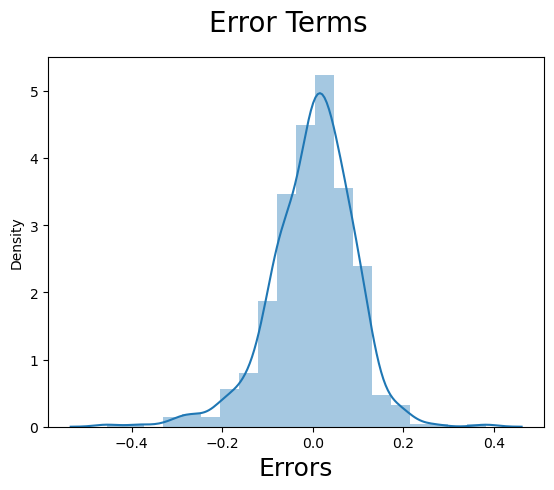

In [157]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)       

## Making prediction on test data

In [158]:
#Applying scaling on test set
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

boom_test[num_vars] = scaler.transform(boom_test[num_vars])

In [159]:
#Dividing test set into X and y 
y_test = boom_test.pop('cnt')
X_test = boom_test

In [160]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [161]:
# Making predictions
y_pred = lr.predict(X_test_new)

## Model evaluation

Text(0, 0.5, 'y_pred')

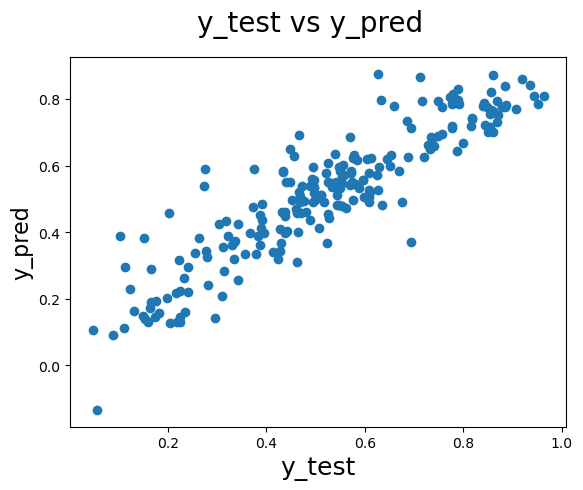

In [162]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [163]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

0.07105310072500882
0.008745461476134555
0.09351717209226632
0.815868772072207


#### We can see that the equation of our best fitted line is:
cnt = 0.2956 + 0.2354(yr) -0.0932(holiday) + 0.3975(temp) - 0.1490(windspeed) - 0.1353(season_Spring) - 0.0678(mnth_July) + 0.0571(mnth_October) + 0.0642(mnth_September) - 0.2921(weathersit_Light snow) - 0.0827(weathersit_Misty)